In [1]:
from glob import glob
import pandas as pd
import numpy as np

In [2]:
awards_headers=['event_key award_type_enum', 'award_name', 'team', 'awardee']
matches_headers=['event_key match_key', 'red1', 'red2', 'red3', 'blue1', 'blue2', 'blue3', 'red_score', 'blue_score']

# Processing Matches

In [3]:
matches_csvs = glob('../Datasets/frc/events/**/**/*_matches.csv')

In [4]:
to_combine = []

for matches_csv in matches_csvs:
    # Read CSV with custom column names
    matches_df = pd.read_csv(matches_csv, header=None, names=matches_headers)
    
    # Separate event_key and matches_key
    matches_df['event_key'], matches_df['match_key'] = zip(*matches_df['event_key match_key'].str.split('_'))
    matches_df.drop(columns=['event_key match_key'], inplace=True)
    
    # Make it a per-team basis
    matches_df = matches_df.melt(
        id_vars=['event_key', 'match_key', 'red_score', 'blue_score'],
        value_vars=['red1', 'red2', 'red3', 'blue1', 'blue2', 'blue3'],
        var_name='match_role',
        value_name='team',
    )
    
    if (matches_df['team'].dtype is np.dtype(np.object)):
        matches_df['team'] = pd.to_numeric(matches_df['team'].str.extract('(\d+)')[0], errors='coerce', downcast='integer')
    
    matches_df['alliance'] = matches_df['match_role'].str[:-1]


    matches_df['team_score'] = np.where(
        matches_df['alliance'] == 'red',
        matches_df['red_score'],
        matches_df['blue_score']
    )
    # matches_df.drop(columns=['red_score', 'blue_score'], inplace=True)


    to_combine.append(matches_df)

matches_df = pd.concat(to_combine)

,event_key,match_key,red_score,blue_score,match_role,team,alliance,team_score
0,2013azch,f1m1,111.0,69.0,red1,3944.0,red,111.0
1,2013azch,f1m2,114.0,50.0,red1,842.0,red,114.0
2,2013azch,qf1m1,87.0,89.0,red1,3944.0,red,87.0
3,2013azch,qf1m2,106.0,62.0,red1,3944.0,red,106.0
4,2013azch,qf1m3,133.0,60.0,red1,3944.0,red,133.0


In [29]:
matches_df.head()

,event_key,match_key,red_score,blue_score,match_role,team,alliance,team_score
0,2013azch,f1m1,111.0,69.0,red1,3944.0,red,111.0
1,2013azch,f1m2,114.0,50.0,red1,842.0,red,114.0
2,2013azch,qf1m1,87.0,89.0,red1,3944.0,red,87.0
3,2013azch,qf1m2,106.0,62.0,red1,3944.0,red,106.0
4,2013azch,qf1m3,133.0,60.0,red1,3944.0,red,133.0


# Processing Rankings

In [5]:
rankings_csvs = glob('../Datasets/frc/events/**/**/*_rankings.csv')

In [6]:
to_combine = []

for rankings_csv in rankings_csvs:
    rankings_df = pd.read_csv(rankings_csv)
    
    rankings_df = rankings_df[['Rank', 'Team']]
    rankings_df.columns = rankings_df.columns.str.lower()
    rankings_df['event_key'] = rankings_csv.split('/')[5]
    
    to_combine.append(rankings_df)

rankings_df = pd.concat(to_combine)

,rank,team,event_key
0,1,1726,2013azch
1,2,1492,2013azch
2,3,1290,2013azch
3,4,2449,2013azch
4,5,60,2013azch


In [ ]:
rankings_df.head()

# Processing Awards

In [7]:
awards_csvs = glob('../Datasets/frc/events/**/**/*_awards.csv')

In [8]:
to_combine = []

for awards_csv in awards_csvs:
    awards_df = pd.read_csv(awards_csv, header=None, names=awards_headers)
    
    awards_df['event_key'], awards_df['award_type_enum'] = zip(*awards_df['event_key award_type_enum'].str.split('_', 1))
    
    awards_df['award_type_enum'] = awards_df['award_type_enum'].astype(int)
    
    if (awards_df['team'].dtype is np.dtype(np.object)):
        awards_df['team'] = pd.to_numeric(awards_df['team'].str.extract('(\d+)')[0], errors='coerce', downcast='integer')
    
    awards_df['award_type'] = awards_df['award_type_enum'].map({ 0: 'CHAIRMANS', 1: 'WINNER', 2: 'FINALIST' })
    
    awards_df.drop(columns=['awardee', 'event_key award_type_enum'], inplace=True)
    
    to_combine.append(awards_df)

awards_df = pd.concat(to_combine)

,award_name,team,event_key,award_type_enum,award_type
0,Regional Chairman's Award,2486.0,2013azch,0,CHAIRMANS
1,Regional Winners,3944.0,2013azch,1,WINNER
2,Regional Winners,842.0,2013azch,1,WINNER
3,Regional Winners,1726.0,2013azch,1,WINNER
4,Rookie All Star Award,4629.0,2013azch,10,NaN


In [ ]:
awards_df.head()

# Processing Teams

In [9]:
import datetime

In [10]:
teams_df = pd.read_csv('../Datasets/frc/teams/teams.csv', header=None)

teams_df = teams_df[[0, 7]].dropna()
teams_df.columns = ['team', 'rookie_year']

teams_df['rookie_year'] = teams_df['rookie_year'].astype(int)
teams_df['team'] = teams_df['team'].str.slice(start=3).astype(int)

teams_df['age'] = datetime.datetime.now().year - teams_df['rookie_year']

,team,rookie_year,age
0,1,1997,22
1,4,1997,22
2,5,1998,21
3,6,1994,25
5,8,1996,23


In [ ]:
teams_df.head()

# Processing Event Atendees

In [11]:
atendees_csvs = glob('../Datasets/frc/events/**/**/*_teams.csv')

In [12]:
to_combine = []

for atendees_csv in atendees_csvs:
    atendees_df = pd.read_csv(atendees_csv, header=None)
    atendees_df['event_key'] = atendees_csv.split('/')[5]
    
    atendees_df = atendees_df.melt(
        id_vars=['event_key'],
        value_name='team'
    )
    
    atendees_df['team'] = atendees_df['team'].str.slice(start=3).astype(int)
    atendees_df.drop(columns=['variable'], inplace=True)
    
    to_combine.append(atendees_df)

atendees_df = pd.concat(to_combine)

,event_key,team
0,2013azch,1011
1,2013azch,1013
2,2013azch,1164
3,2013azch,1165
4,2013azch,1212


In [ ]:
atendees_df.head()

# Exploration

In [13]:
import seaborn as sns

# How closely related is a team's age and their event winrate?

In [14]:
df = pd.merge(atendees_df, awards_df, on=['event_key', 'team'], how='inner')
df['won'] = df['award_type'] == 'WINNER'
df.drop(columns=['award_name', 'award_type_enum', 'award_type'], inplace=True)
df = df.groupby('team').mean()

In [15]:
df.reset_index(inplace=True)
df.rename(columns={'won': 'winrate'}, inplace=True)
df = pd.merge(df, teams_df, on=['team'], how='inner')
df.head()

,team,winrate,rookie_year,age
0,1,0.088235,1997,22
1,4,0.250000,1997,22
2,5,0.200000,1998,21
3,6,0.000000,1994,25
4,8,0.062500,1996,23


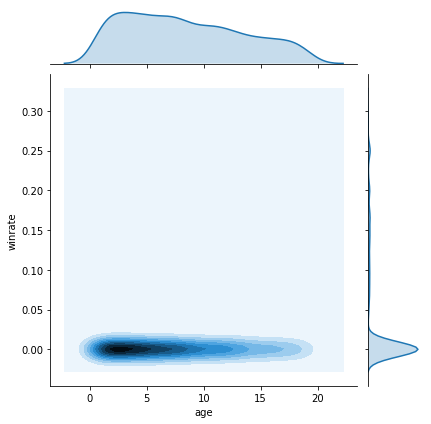

In [16]:
sns.jointplot(
    x='age', y='winrate',
    data=df[(df['age'] < 20) & (df['winrate'] <= 0.3)],
    kind='kde'
)

# How do the differences between alliance scores change over time

In [17]:
df = matches_df.copy()
df['score_diff'] = abs(df['red_score'] - df['blue_score'])
df['year'] = df['event_key'].str.slice(stop=4).astype(int)
df.head()

,event_key,match_key,red_score,blue_score,match_role,team,alliance,team_score,score_diff,year
0,2013azch,f1m1,111.0,69.0,red1,3944.0,red,111.0,42.0,2013
1,2013azch,f1m2,114.0,50.0,red1,842.0,red,114.0,64.0,2013
2,2013azch,qf1m1,87.0,89.0,red1,3944.0,red,87.0,2.0,2013
3,2013azch,qf1m2,106.0,62.0,red1,3944.0,red,106.0,44.0,2013
4,2013azch,qf1m3,133.0,60.0,red1,3944.0,red,133.0,73.0,2013


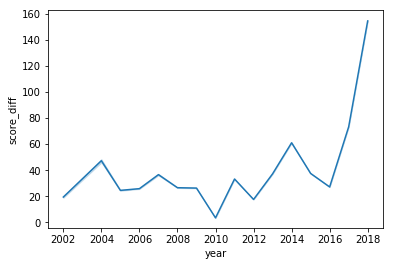

In [18]:
sns.lineplot(x='year', y='score_diff', data=df)

Larger differences in suggest more "steam-rolled" matches which are likely less interesting to watch and play.

# How does match winrate relate to age

In [19]:
df = matches_df.copy().dropna()
df.head()

,event_key,match_key,red_score,blue_score,match_role,team,alliance,team_score
0,2013azch,f1m1,111.0,69.0,red1,3944.0,red,111.0
1,2013azch,f1m2,114.0,50.0,red1,842.0,red,114.0
2,2013azch,qf1m1,87.0,89.0,red1,3944.0,red,87.0
3,2013azch,qf1m2,106.0,62.0,red1,3944.0,red,106.0
4,2013azch,qf1m3,133.0,60.0,red1,3944.0,red,133.0


In [21]:
df['won'] = (df['red_score'] > df['blue_score']) & (df['alliance'] == 'red')

In [22]:
df = df.groupby('team').mean()
df.reset_index(inplace=True)
df.rename(columns={ 'won': 'winrate' }, inplace=True)
df.drop(columns=['red_score', 'blue_score', 'team_score'], inplace=True)
df = pd.merge(df, teams_df, on=['team'], how='inner')
df.head()

,team,winrate,rookie_year,age
0,1.0,0.268603,1997,22
1,4.0,0.203474,1997,22
2,5.0,0.226667,1998,21
3,8.0,0.241509,1996,23
4,9.0,0.169492,1998,21


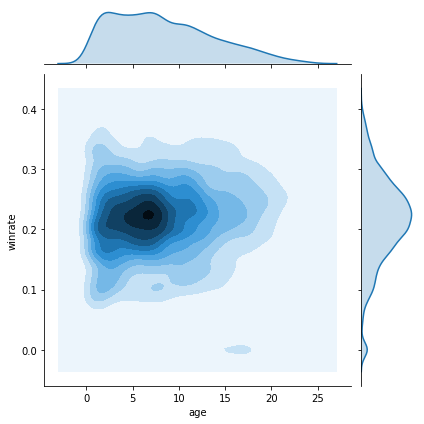

In [23]:
sns.jointplot(x='age', y='winrate', data=df[(df['age'] < 25) & (df['winrate'] < 0.4)], kind='kde')

### Doesn't seem particularly unique

# Red vs. Blue Winrate?

In [24]:
df = matches_df.copy().dropna()
df['won'] = (df['red_score'] > df['blue_score']) ^ (df['alliance'] == 'blue')
df['year'] = df['event_key'].str[:4].astype(int)

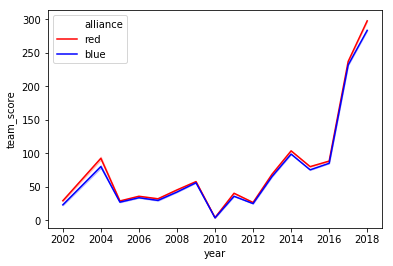

In [25]:
sns.lineplot(
    x='year', y='team_score',
    hue='alliance', palette=['red', 'blue'],
    data=df
)

### Well that's not helpful

In [26]:
mean_year = df.groupby('year')['team_score'].mean()
df['rel_score'] = df['team_score'] / df['year'].map(mean_year)

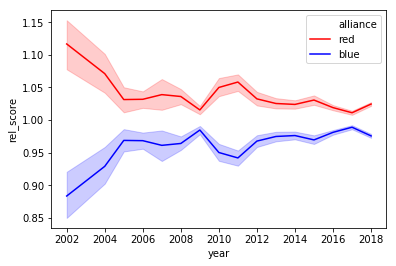

In [27]:
sns.lineplot(x='year', y='rel_score', hue='alliance', data=df, palette=['red', 'blue'])

### Somehow being on the red alliance makes you play better